In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [ ]:
data = pd.read_csv("yelp_reviews_KBBQ.csv")
data.head(n = 10)

,Hanu Korean BBQ - 4.8 Stars,Prime K BBQ - 4.8 Stars,King Chang LA - 4.8 Stars,PZK BBQ - 4.7 Stars,Woo Hyang Woo - 4.6 Stars,J BBQ - 3.6 Stars,Castle BBQ - 3.5 Stars,Moodaepo - 3.3 Stars,Bud Namu Korean BBQ - 3.3 Stars,MOON BBQ 2 - 3.0 Stars
0,"Such an amazing place, great food, great servi...","If you're a meat enthusiast like me, this Kore...",Best Small Instance Soup ever. They offer vari...,My family was super hungry. Everything was ful...,Got recommended to go there by Alex and it was...,Service is amazing ! I have an autistic child ...,"Everything was good, the service, the food, ev...",Great service... nice atmosphere .. food was ...,Price: 10/10Service: 10/10Staff: Super friendl...,It's been so long since I've been here and it ...
1,The staff were nice and kind and they cooked f...,Make this your go to KBBQ spot! For the qualit...,Been here twice and it's been great! Service i...,VERY Bad service AND BAD quality meats NEVER c...,"Food is amazing, staff is super accommodating,...","The meat quality, service and ambiance are TOP...",I absolutely love this place but... too small!...,Combo A Lunch Special for only $25.99! I'm not...,I used to go to this AYCE KBBQ a lot in colleg...,At here on a Sunday after around 4pm.. it seem...
2,Best Korean bbq in LA request for Michael Jack...,Prime K BBQ was pretty good. Me and my family ...,This place has great service and plenty of opt...,"Service was very fast, we were guided to our s...",I've been to most KBBQ spots in Ktown; from th...,I was a bit skeptical at first. My non Asian f...,Not sure why this place is only 3.5 stars. Abs...,Moodaepo has one of the cheapest AYCE KBBQ opt...,I recently had the pleasure of dining at Bud N...,This is my go to spot for kbbq! The service is...
3,Had a great lunch with some work friends. Lena...,"Affordable, decent quality and great side dish...",This place has AMAZING KBBQ. There is a lot of...,PZK BBQ is a KBBQ spot outside of Koreatown an...,/)/) ( . .) ( づ I really wanted to like this p...,We came on a Sunday and although it says 11AM ...,Came in with my family for a quick lunch. The ...,Got there at 11:30m. Business advertising that...,"Hole in the wall, decent place with decent mea...",I'm here at 9:40 PM at the counter ready to or...
4,What a great find in K-town! Came here for the...,Not AYCE but it's a LOT of food. Our party of ...,"Our server Wayne, was really kind and fun. The...",For AYCE the price isn't too bad. I really lik...,"Cant BEEF-lieve I had kbbq 3 nights in a row, ...",Good Food and Service... We appreciate everyon...,This place is a solid 4/5! The price is the ch...,Great KBBQ place. Perfect for large parties. I...,This restaurant located in the heart of K-town...,Ol reliable. I choose Set A and that's satisfy...
5,Hanu was absolutely delicious!!! From someone ...,I came here recently while visiting LA. A frie...,Saturday 5pmParking/Wait: They have a valet-on...,This place is a good little kbbq spot in La . ...,Service was great but their beef bowls are not...,Okay got a surprise birthday party with my bf'...,GREAT prices (one of the most affordable optio...,So I've been coming here for years and the foo...,Bud Namu is a kbbq spot I've been going to for...,Small parking lot but you can valet for $5. Th...
6,"In my opinion, Korean food in Los Angeles is s...",My friend suggested this place to me and my pa...,Seeing a lot of reviews on here from accounts ...,"I recently visited PZK BBQ, a late-night Korea...",Woo Hyang Woo is Korean BBQ spot with lunch sp...,"Parking was a little inconvenient, but the foo...",Me and my coworkers were initially going to go...,I love coming here for Korean bbq. However the...,"Amazing place, amazing food!! The service was ...",This is my go-to spot for cheap kbbq eats. The...
7,Service:- have a cute robot assistant that bri...,Quality of the meat and good service. Those ar...,If you're looking for an unforgettable Korean ...,This place is such a gem. Easily the best Kore...,"High quality m

After all the data has been concat to one CSV file we now have a single dataset consisting of ten restaurants with 100 reviews to accompany each.

In [ ]:
hanu_kbbq = data[['Hanu Korean BBQ - 4.8 Stars']].copy()
hanu_kbbq = hanu_kbbq.rename(columns={'Hanu Korean BBQ - 4.8 Stars': 'Review'})

prime_k = data[['Prime K BBQ - 4.8 Stars']].copy()
prime_k = prime_k.rename(columns={'Prime K BBQ - 4.8 Stars': 'Review'})

king_chang_LA = data[['King Chang LA - 4.8 Stars']].copy()
king_chang_LA = king_chang_LA.rename(columns={'King Chang LA - 4.8 Stars': 'Review'})

pzkbbq = data[['PZK BBQ - 4.7 Stars']].copy()
pzkbbq = pzkbbq.rename(columns={'PZK BBQ - 4.7 Stars': 'Review'})

woo_hyang_woo = data[['Woo Hyang Woo - 4.6 Stars']].copy()
woo_hyang_woo = woo_hyang_woo.rename(columns={'Woo Hyang Woo - 4.6 Stars': 'Review'})

j_bbq = data[['J BBQ - 3.6 Stars']].copy()
j_bbq = j_bbq.rename(columns={'J BBQ - 3.6 Stars': 'Review'})

castle_bbq = data[['Castle BBQ - 3.5 Stars']].copy()
castle_bbq = castle_bbq.rename(columns={'Castle BBQ - 3.5 Stars': 'Review'})

moodaepo = data[['Moodaepo - 3.3 Stars']].copy()
moodaepo = moodaepo.rename(columns={'Moodaepo - 3.3 Stars': 'Review'})

bud_namu_kbbq = data[['Bud Namu Korean BBQ - 3.3 Stars']].copy()
bud_namu_kbbq = bud_namu_kbbq.rename(columns={'Bud Namu Korean BBQ - 3.3 Stars': 'Review'})

moon_bbq = data[['MOON BBQ 2 - 3.0 Stars']].copy()
moon_bbq = moon_bbq.rename(columns={'MOON BBQ 2 - 3.0 Stars': 'Review'})

Here, we split the main data into individual data frames. This is necessary for us in order to index our data, and apply functions to it.

In [ ]:
length = len(hanu_kbbq['Review'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 130


In [ ]:
hanu_kbbq['Length'] = hanu_kbbq['Review'].str.len()
prime_k['Length'] = prime_k['Review'].str.len()
king_chang_LA['Length'] = king_chang_LA['Review'].str.len()
pzkbbq['Length'] = pzkbbq['Review'].str.len()
woo_hyang_woo['Length'] = woo_hyang_woo['Review'].str.len()
j_bbq['Length'] = j_bbq['Review'].str.len()
castle_bbq['Length'] = castle_bbq['Review'].str.len()
moodaepo['Length'] = moodaepo['Review'].str.len()
bud_namu_kbbq['Length'] = bud_namu_kbbq['Review'].str.len()
moon_bbq['Length'] = moon_bbq['Review'].str.len()

In [ ]:
word_count = hanu_kbbq['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 23


In [ ]:
def clean(review):
    review = str(review)
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if
                       word not in stopwords.words('english')])
    return review

In [ ]:
hanu_kbbq['Review'] = hanu_kbbq['Review'].apply(clean)
prime_k['Review'] = prime_k['Review'].apply(clean)
king_chang_LA['Review'] = king_chang_LA['Review'].apply(clean)
pzkbbq['Review'] = pzkbbq['Review'].apply(clean)
woo_hyang_woo['Review'] = woo_hyang_woo['Review'].apply(clean)
j_bbq['Review'] = j_bbq['Review'].apply(clean)
castle_bbq['Review'] = castle_bbq['Review'].apply(clean)
moodaepo['Review'] = moodaepo['Review'].apply(clean)
bud_namu_kbbq['Review'] = bud_namu_kbbq['Review'].apply(clean)
moon_bbq['Review'] = moon_bbq['Review'].apply(clean)

defined a function - clean - that will take in a string (review), and removes the upper case letters, substitutes all non lower case, upper case, or numerical characters into '', and splits the words into a list, removing stop words, and then joins them back together

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

Here, we define a function "corpus" that takes in text, and then splits it into a list. This is a vital step in order to proceed with our projects methods like TF-IDF and to find the frequencies of words.

In [ ]:
dataframes = [hanu_kbbq, prime_k, king_chang_LA, pzkbbq, woo_hyang_woo,
              j_bbq, castle_bbq, moodaepo, bud_namu_kbbq, moon_bbq]

merged_df = pd.concat(dataframes, ignore_index=True)

merged_df['Review_lists'] = merged_df['Review'].apply(corpus)

# Display the merged DataFrame
print(merged_df['Review_lists'].head(n=1000))

0      [amazing, place, great, food, great, service, ...
1      [staff, nice, kind, cooked, us, food, good, ta...
2      [best, korean, bbq, la, request, michael, jack...
3      [great, lunch, work, friends, lena, server, gr...
4      [great, find, k-town, came, first, time, husba...
                             ...                        
995    [small, parking, lot, valet, 5, inside, seatin...
996    [go-to, spot, cheap, kbbq, eats, small, parkin...
997    [one, kbbq, opened, later, night, sundays, see...
998    [place, great, meat, quality, good, menu, cons...
999    [place, lovely, salad, bar, go, delicious, sel...
Name: Review_lists, Length: 1000, dtype: object


Since our data is split into multiple data frames, and we want to be able to look at the corups for all the reviews combined, we merge the data into one data frame.

In [ ]:
corpus = []
for i in trange(merged_df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += merged_df['Review_lists'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:00<00:00, 89978.44it/s]


50946

create a empty list (corpus), and create a progess bar to show the data from 'Review Lists' being appened to the corpus list.

In [ ]:
mostCommon = Counter(corpus).most_common(30)
mostCommon

[('service', 689),
 ('good', 661),
 ('meat', 624),
 ('place', 607),
 ('food', 585),
 ('great', 525),
 ('kbbq', 384),
 ('us', 373),
 ('quality', 361),
 ('like', 322),
 ('also', 305),
 ('back', 298),
 ('parking', 288),
 ('bbq', 285),
 ('beef', 282),
 ('korean', 279),
 ('really', 275),
 ('time', 274),
 ('get', 263),
 ('come', 261),
 ('definitely', 249),
 ('one', 246),
 ('would', 224),
 ('came', 218),
 ('best', 211),
 ('price', 211),
 ('dont', 208),
 ('combo', 200),
 ('go', 199),
 ('amazing', 198)]

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

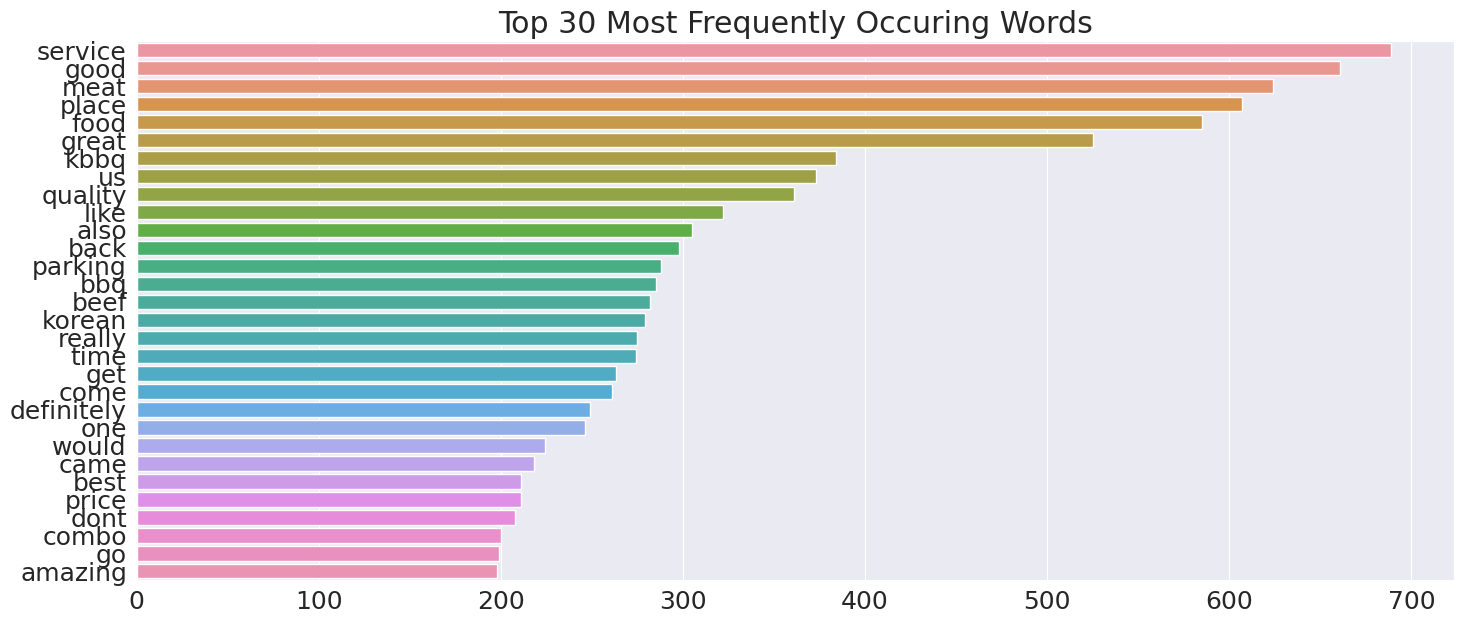

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 30 Most Frequently Occuring Words')
plt.show()

Once term-frequency is determined for all restaurants within the dataset we can note the 30 most utilized words within. We can note that service is the highest used word/token with good and meat being close behind. With this considered, based on frequency, service and food are the qualities of highest priority for diners at K-BBQ restaurants.

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(merged_df['Review'])

In [ ]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

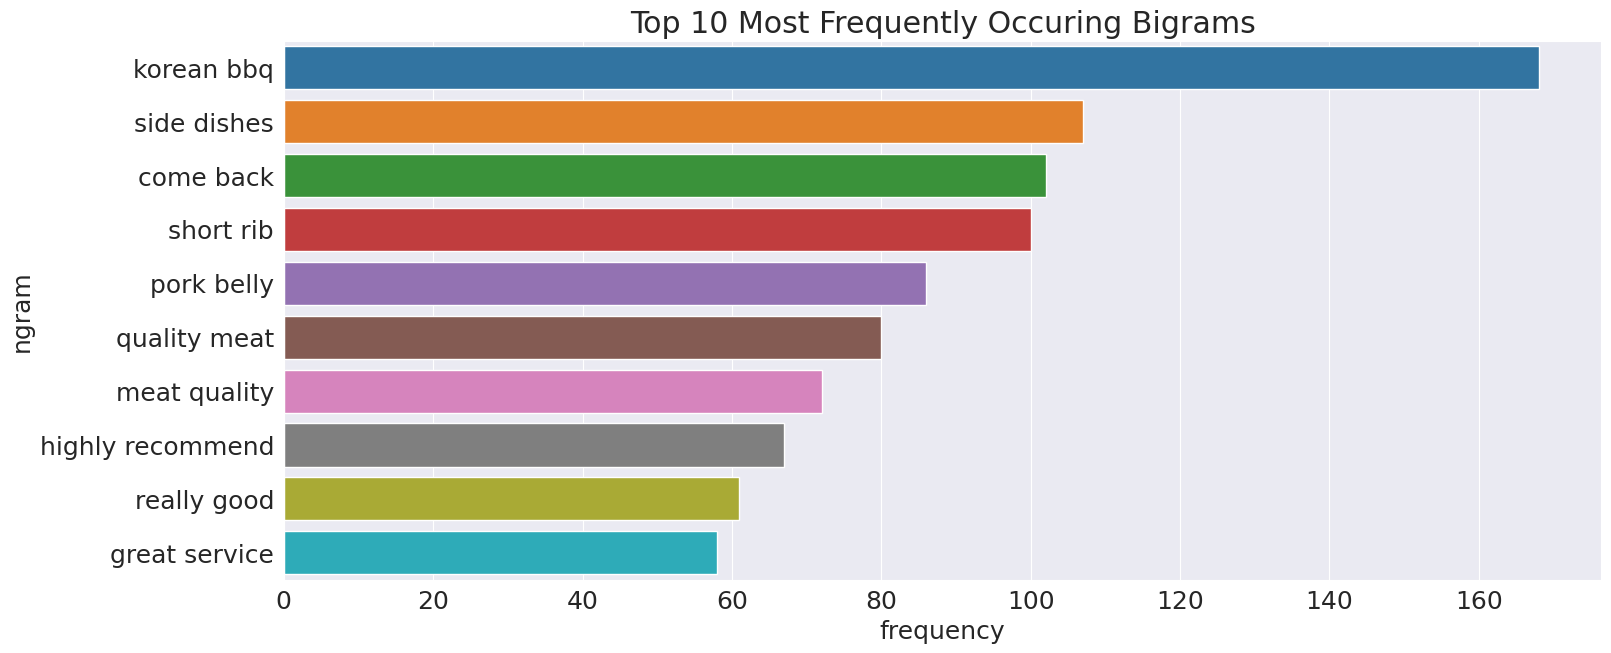

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

Utilizing bi-grams as our frequency method we can note that the most obvious bi-gram is sequence 'korean bbq' itself. Because this is assumed to be the highest frequency we can look at the rest of the data to determine what other bi-grams matter to reviewers. This considered food items like side dishes, short rib, pork belly, and quality meat were all the top sequences. Using bi-grams tells us that food variety and quality are highly sought after qualities.  

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(merged_df['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

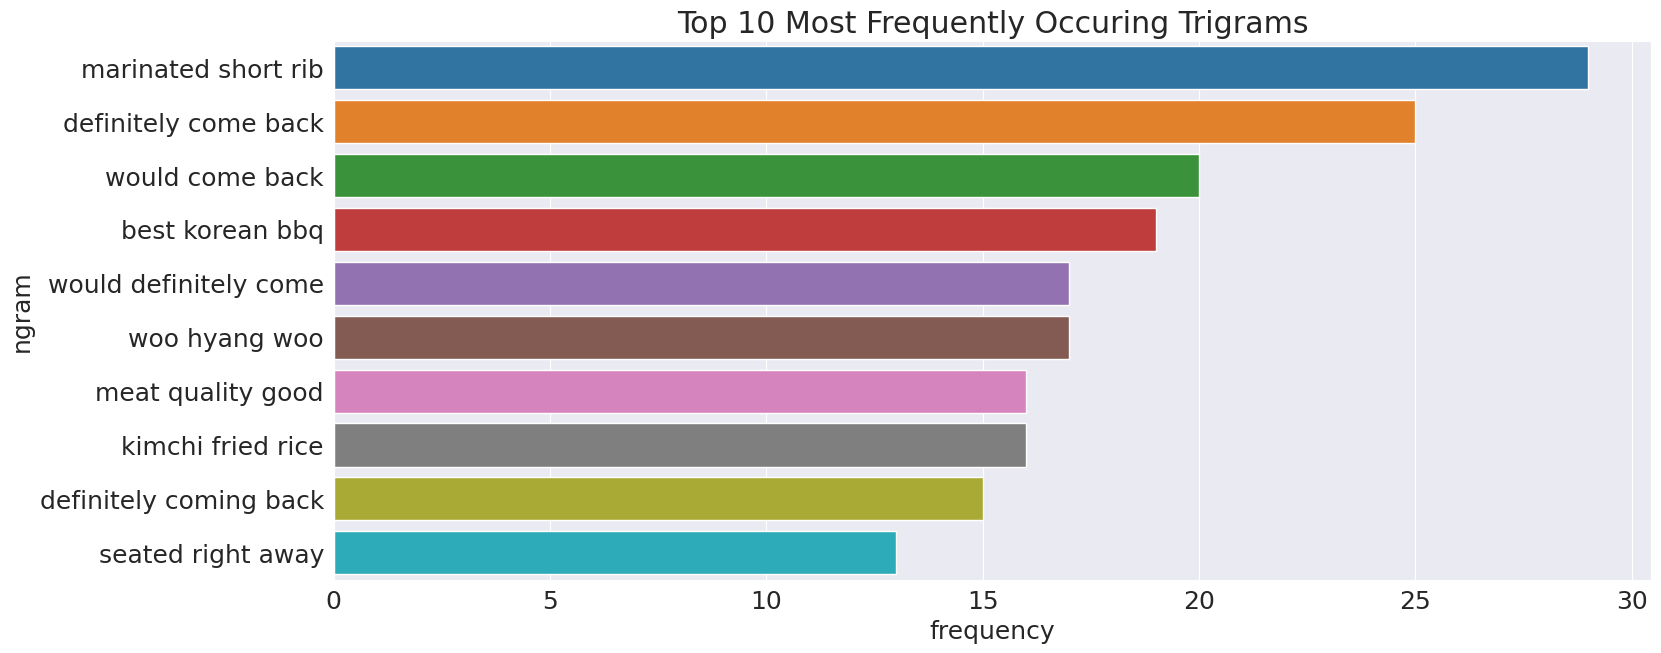

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

Similar to the bi-grams, after calculating the frequency of tri-grams we can observe that types of food such as marinated short rib or kimchi fried rice were commonly used, with marinated short rib being the top choice. Food quality and variety once again were the most popular topics for reviewers when analyzing K-BBQ restaurants.   

#TF-IDF

High rated restaurants:
1. Hanu Korean BBQ - 4.8 stars
2. Prime K BBQ - 4.8 stars
3. King Chang LA - 4.8 stars
4. PZK BBQ - 4.7 Stars
5. Woo Hyang Woo - 4.6 stars

Hanu Korean BBQ - 4.8 stars

In [ ]:
!pip install langdetect

In [ ]:
import pandas as pd
import numpy as np
import string
import langdetect
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('yelp_reviews_KBBQ.csv')

# replace all NaN values
df.fillna('', inplace=True)

# clean reviews
# remove punctuation & uppercase

def text_clean(column):
  column = column.lower()
  column = column.translate(str.maketrans('', '', string.punctuation))
  return column

# unecessary words
tfidf_vectorizer_0 = TfidfVectorizer(stop_words='english')

# specify column
column_0 = 'Hanu Korean BBQ - 4.8 Stars'

df[column_0] = df[column_0].apply(text_clean)

# specify column in matrix
tfidf_matrix_0 = tfidf_vectorizer_0.fit_transform(df[column_0])

# create tfidf matrix
tfidf_df_0 = pd.DataFrame(tfidf_matrix_0.toarray(), columns=tfidf_vectorizer_0.get_feature_names_out())
print (tfidf_df_0)

     09302023   10  1000000000000000  10010  1010  10the   12  12999  \
0         0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
1         0.0  0.0          0.375909    0.0   0.0    0.0  0.0    0.0   
2         0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
3         0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
4         0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
..        ...  ...               ...    ...   ...    ...  ...    ...   
105       0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
106       0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
107       0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
108       0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   
109       0.0  0.0          0.000000    0.0   0.0    0.0  0.0    0.0   

     14999spicy  150  ...  youre  yourself6  youthey  youthis  youtube  youve  \
0           0.0  0.0  ...    0.0        0.0      0.0  

In [ ]:
# find most important words
high_df_words = tfidf_df_0.sum().sort_values(ascending=False).head(10)
print (high_df_words)

food       5.723386
great      5.393786
meat       4.867576
service    4.561904
beef       4.494867
good       4.134559
place      4.089783
combo      4.037313
kbbq       3.847200
server     3.115545
dtype: float64


2. Prime K BBQ - 4.8 stars


In [ ]:
# specify column
column_1 = 'Prime K BBQ - 4.8 Stars'

df[column_1] = df[column_1].apply(text_clean)

#language
df[column_1] = df[column_1].apply(lambda x: x if (len(x) > 1 and detect(x) == 'en') else '')
df = df[df[column_1] != '']

# unecessary words
tfidf_vectorizer_1 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_1 = tfidf_vectorizer_1.fit_transform(df[column_1])

# create tfidf matrix
tfidf_df_1 = pd.DataFrame(tfidf_matrix_1.toarray(), columns=tfidf_vectorizer_1.get_feature_names_out())
print (tfidf_df_1)

     10       100  1010  1045pm      10pm  1110  1115pm   12       120  160  \
0   0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   
1   0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.152864  0.0   
2   0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   
3   0.0  0.000000   0.0     0.0  0.109974   0.0     0.0  0.0  0.000000  0.0   
4   0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   
..  ...       ...   ...     ...       ...   ...     ...  ...       ...  ...   
81  0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   
82  0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   
83  0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   
84  0.0  0.316865   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   
85  0.0  0.000000   0.0     0.0  0.000000   0.0     0.0  0.0  0.000000  0.0   

    ...  wouldve       wow  wrappers  writing  writ

In [ ]:
# find most important words
high_df_words = tfidf_df_1.sum().sort_values(ascending=False).head(10)
print (high_df_words)

meat          5.654619
quality       5.542337
place         5.492609
great         4.904881
service       4.853308
good          4.413865
food          3.970838
korean        3.309478
amazing       3.125325
definitely    3.118008
dtype: float64


4. PZK BBQ - 4.7 stars

In [ ]:
# specify column
column_2 = 'King Chang LA - 4.8 Stars'

df[column_2] = df[column_2].apply(text_clean)

# unecessary words
tfidf_vectorizer_2 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_2 = tfidf_vectorizer_2.fit_transform(df[column_2])

# create tfidf matrix
tfidf_df_2 = pd.DataFrame(tfidf_matrix_2.toarray(), columns=tfidf_vectorizer_2.get_feature_names_out())
print (tfidf_df_2)

     01   10  100  1000pm  1010  1110  11pm   12      1723        20  ...  \
0   0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
1   0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
2   0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
3   0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
4   0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
..  ...  ...  ...     ...   ...   ...   ...  ...       ...       ...  ...   
81  0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
82  0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
83  0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   
84  0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.073011  0.066809  ...   
85  0.0  0.0  0.0     0.0   0.0   0.0   0.0  0.0  0.000000  0.000000  ...   

    yangnyum  yelp  yesterday  yifang  youll  youre  youve  yukhwae  yummy 

In [ ]:
# find most important words
high_df_words = tfidf_df_2.sum().sort_values(ascending=False).head(10)
print (high_df_words)

great        5.244746
good         4.724802
service      4.631807
food         4.517533
combo        3.869048
place        3.722030
really       3.519240
meat         3.478002
intestine    3.171341
wayne        2.987144
dtype: float64


4. PZK BBQ - 4.7 stars

In [ ]:
# specify column
column_3 = 'PZK BBQ - 4.7 Stars'

df[column_3] = df[column_3].apply(text_clean)

# unecessary words
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_3 = tfidf_vectorizer_3.fit_transform(df[column_3])

# create tfidf matrix
tfidf_df_3 = pd.DataFrame(tfidf_matrix_3.toarray(), columns=tfidf_vectorizer_3.get_feature_names_out())
print (tfidf_df_3)

          10      1010   11        12   15  1520  1999      1hr   20  200  \
0   0.000000  0.000000  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   
1   0.163636  0.000000  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   
2   0.000000  0.000000  0.0  0.000000  0.0   0.0   0.0  0.14903  0.0  0.0   
3   0.000000  0.000000  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   
4   0.000000  0.000000  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   
..       ...       ...  ...       ...  ...   ...   ...      ...  ...  ...   
81  0.000000  0.000000  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   
82  0.000000  0.000000  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   
83  0.000000  0.000000  0.0  0.079715  0.0   0.0   0.0  0.00000  0.0  0.0   
84  0.000000  0.000000  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   
85  0.000000  0.320903  0.0  0.000000  0.0   0.0   0.0  0.00000  0.0  0.0   

    ...  yep  york  youd  youi    youll  younger  youngest     youre  youve

In [ ]:
# find most important words
high_df_words = tfidf_df_3.sum().sort_values(ascending=False).head(10)
print (high_df_words)

great      5.346241
place      5.099568
good       4.216658
service    4.110064
food       4.088194
meat       3.603990
ayce       3.186903
quality    3.131624
kbbq       3.041681
bbq        2.896310
dtype: float64


5. Woo Hyang Woo - 4.6 stars

In [ ]:
# specify column
column_4 = 'Woo Hyang Woo - 4.6 Stars'

df[column_4] = df[column_4].apply(text_clean)

# unecessary words
tfidf_vectorizer_4 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_4 = tfidf_vectorizer_4.fit_transform(df[column_4])

# create tfidf matrix
tfidf_df_4 = pd.DataFrame(tfidf_matrix_4.toarray(), columns=tfidf_vectorizer_4.get_feature_names_out())
print (tfidf_df_4)

          10  100      1010  1015  10pm  1110  1130am2pm  129        14  \
0   0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   
1   0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   
2   0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   
3   0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   
4   0.063092  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.088919   
..       ...  ...       ...   ...   ...   ...        ...  ...       ...   
81  0.000000  0.0  0.179572   0.0   0.0   0.0        0.0  0.0  0.000000   
82  0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   
83  0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   
84  0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   
85  0.000000  0.0  0.000000   0.0   0.0   0.0        0.0  0.0  0.000000   

        1520  ...  yelp  yelpers  yes  youll  young     youre       yuk  \
0   0.000000  ...   0.0 

In [ ]:
# find most important words
high_df_words = tfidf_df_4.sum().sort_values(ascending=False).head(10)
print (high_df_words)

good       4.312248
great      4.246579
food       4.237705
place      4.220060
service    3.980163
meat       3.713371
really     3.284795
alex       3.141005
rib        3.080818
woo        3.060918
dtype: float64


Lowest Rated Restaurants:
1. J BBQ - 3.6 stars
2. Castle BBQ - 3.5 stars
3. Moodaepo - 3.3 stars
4. Bud Namu Korean BBQ - 3.3 stars
5. MOON BBQ 2 - 3.0 stars


1. J BBQ - 3.6 stars

In [ ]:
# specify column
column_5 = 'J BBQ - 3.6 Stars'

df[column_5] = df[column_5].apply(text_clean)

# unecessary words
tfidf_vectorizer_5 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_5 = tfidf_vectorizer_5.fit_transform(df[column_5])

# create tfidf matrix
tfidf_df_5 = pd.DataFrame(tfidf_matrix_5.toarray(), columns=tfidf_vectorizer_5.get_feature_names_out())
print (tfidf_df_5)

     10  100  1030pm  1099   11      11am   12  1299  1299person      12pm  \
0   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
1   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
2   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
3   0.0  0.0     0.0   0.0  0.0  0.146648  0.0   0.0         0.0  0.146648   
4   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
..  ...  ...     ...   ...  ...       ...  ...   ...         ...       ...   
81  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
82  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
83  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
84  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
85  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   

    ...  yesterday  yikes  youll  young  younger  youre  youthe

In [ ]:
# find most important words
high_df_words = tfidf_df_5.sum().sort_values(ascending=False).head(10)
print (high_df_words)

place      4.204855
good       4.174040
food       3.861271
service    3.825460
meat       3.630803
great      2.900231
parking    2.846078
quality    2.436575
time       2.429465
come       2.362051
dtype: float64


2. Castle BBQ - 3.5 stars

In [ ]:
column_6 = 'Castle BBQ - 3.5 Stars'

df[column_6] = df[column_6].apply(text_clean)

# unecessary words
tfidf_vectorizer_6 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_6 = tfidf_vectorizer_6.fit_transform(df[column_6])

# create tfidf matrix
tfidf_df_6 = pd.DataFrame(tfidf_matrix_6.toarray(), columns=tfidf_vectorizer_6.get_feature_names_out())
print (tfidf_df_6)

     10       100  1010    101020   103022     1099   12  121519man  1299  \
0   0.0  0.000000   0.0  0.000000  0.00000  0.00000  0.0        0.0   0.0   
1   0.0  0.000000   0.0  0.000000  0.00000  0.00000  0.0        0.0   0.0   
2   0.0  0.000000   0.0  0.000000  0.00000  0.00000  0.0        0.0   0.0   
3   0.0  0.000000   0.0  0.000000  0.00000  0.00000  0.0        0.0   0.0   
4   0.0  0.000000   0.0  0.000000  0.00000  0.00000  0.0        0.0   0.0   
..  ...       ...   ...       ...      ...      ...  ...        ...   ...   
81  0.0  0.000000   0.0  0.000000  0.00000  0.00000  0.0        0.0   0.0   
82  0.0  0.000000   0.0  0.000000  0.23887  0.00000  0.0        0.0   0.0   
83  0.0  0.000000   0.0  0.327158  0.00000  0.00000  0.0        0.0   0.0   
84  0.0  0.058401   0.0  0.000000  0.00000  0.05344  0.0        0.0   0.0   
85  0.0  0.000000   0.0  0.000000  0.00000  0.00000  0.0        0.0   0.0   

     13  ...    yellow  yelp  yep  yes     youll  younger     youre     you

In [ ]:
# find most important words
high_df_words = tfidf_df_6.sum().sort_values(ascending=False).head(10)
print (high_df_words)

service       4.917927
great         4.740273
good          4.423005
place         4.134615
food          3.712248
love          3.339307
meat          3.274016
kbbq          3.122774
amazing       2.719666
definitely    2.700042
dtype: float64


3. Moodaepo - 3.3 stars

In [ ]:
# specify column
column_7 = 'Moodaepo - 3.3 Stars'

df[column_7] = df[column_7].apply(text_clean)

# unecessary words
tfidf_vectorizer_7 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_7 = tfidf_vectorizer_7.fit_transform(df[column_7])

# create tfidf matrix
tfidf_df_7 = pd.DataFrame(tfidf_matrix_7.toarray(), columns=tfidf_vectorizer_7.get_feature_names_out())
print (tfidf_df_7)

     10  1000  10000  1030  105am     1130m      11am   12    1210am  124  \
0   0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
1   0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
2   0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
3   0.0   0.0    0.0   0.0    0.0  0.192614  0.192614  0.0  0.192614  0.0   
4   0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
..  ...   ...    ...   ...    ...       ...       ...  ...       ...  ...   
81  0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
82  0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
83  0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
84  0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   
85  0.0   0.0    0.0   0.0    0.0  0.000000  0.000000  0.0  0.000000  0.0   

    ...  yall  year    years  yes  youll  younger     youre  yourselfoveral

In [ ]:
# find most important words
high_df_words = tfidf_df_7.sum().sort_values(ascending=False).head(10)
print (high_df_words)

service    5.828416
great      5.066530
good       5.011733
food       4.864553
place      3.947389
kbbq       3.161935
meat       3.024160
come       2.550899
time       2.306174
amazing    2.247147
dtype: float64


4. Bud Namu Korean BBQ - 3.3 stars

In [ ]:
# specify column
column_8 = 'Bud Namu Korean BBQ - 3.3 Stars'

df[column_8] = df[column_8].apply(text_clean)

#language
# df[column_8] = df[column_8].apply(lambda x: x if (len(x) > 0 and detect(x) == 'en') else '')
df = df[df[column_8].map(lambda x: x.isascii())]
# df = df[df[column_8] != '']

# unecessary words
tfidf_vectorizer_8 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_8 = tfidf_vectorizer_8.fit_transform(df[column_8])

# create tfidf matrix
tfidf_df_8 = pd.DataFrame(tfidf_matrix_8.toarray(), columns=tfidf_vectorizer_8.get_feature_names_out())
print (tfidf_df_8)

     10  100  1000010  100010      1010  1010pm  1010service  1010staff  11am  \
0   0.0  0.0      0.0     0.0  0.000000     0.0     0.156219   0.156219   0.0   
1   0.0  0.0      0.0     0.0  0.069577     0.0     0.000000   0.000000   0.0   
2   0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   
3   0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   
4   0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   
..  ...  ...      ...     ...       ...     ...          ...        ...   ...   
80  0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   
81  0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   
82  0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   
83  0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   
84  0.0  0.0      0.0     0.0  0.000000     0.0     0.000000   0.000000   0.0   

     12  ...       wow   wr

In [ ]:
# find most important words
high_df_words = tfidf_df_8.sum().sort_values(ascending=False).head(10)
print (high_df_words)

good         6.179572
food         5.369545
place        5.240888
service      4.925730
great        4.411908
kbbq         3.801345
meat         3.246334
love         3.181275
bar          2.999131
recommend    2.877383
dtype: float64


5. MOON BBQ 2 - 3.0 stars

In [ ]:
# specify column
column_9 = 'MOON BBQ 2 - 3.0 Stars'

df[column_9] = df[column_9].apply(text_clean)

# unecessary words
tfidf_vectorizer_9 = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_9 = tfidf_vectorizer_9.fit_transform(df[column_9])

# create tfidf matrix
tfidf_df_9 = pd.DataFrame(tfidf_matrix_9.toarray(), columns=tfidf_vectorizer_9.get_feature_names_out())
print (tfidf_df_9)

    00s   02       10  100  101  1010  1015  1030      1099  1099per  ...  \
0   0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   
1   0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   
2   0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   
3   0.0  0.0  0.14123  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   
4   0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   
..  ...  ...      ...  ...  ...   ...   ...   ...       ...      ...  ...   
80  0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   
81  0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.086325      0.0  ...   
82  0.0  0.0  0.07839  0.0  0.0   0.0   0.0   0.0  0.094490      0.0  ...   
83  0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   
84  0.0  0.0  0.00000  0.0  0.0   0.0   0.0   0.0  0.000000      0.0  ...   

     yo  youd  young     youre  youthe  yum  yummy  yummy8  zero  zone  
0 

In [ ]:
# find most important words
high_df_words = tfidf_df_9.sum().sort_values(ascending=False).head(10)
print (high_df_words)

good       4.730585
great      4.109467
place      3.902826
service    3.779347
food       3.589228
like       3.066601
meat       3.001074
parking    2.891753
kbbq       2.876257
just       2.740798
dtype: float64


Most important words for higher rated restaurants

In [ ]:
# specify column
higher_columns = df.columns[5]

#language
df = df[df[higher_columns].map(lambda x: x.isascii())]

# clean
df[higher_columns] = df[higher_columns].apply(text_clean)

# unecessary words
tfidf_vectorizer_high = TfidfVectorizer(stop_words='english')

# specify column in matrix
tfidf_matrix_high = tfidf_vectorizer_high.fit_transform(df[higher_columns])

# create tfidf matrix
tfidf_df_high = pd.DataFrame(tfidf_matrix_high.toarray(), columns=tfidf_vectorizer_high.get_feature_names_out())
print (tfidf_df_high)

     10  100  1030pm  1099   11      11am   12  1299  1299person      12pm  \
0   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
1   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
2   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
3   0.0  0.0     0.0   0.0  0.0  0.146733  0.0   0.0         0.0  0.146733   
4   0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
..  ...  ...     ...   ...  ...       ...  ...   ...         ...       ...   
80  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
81  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
82  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
83  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   
84  0.0  0.0     0.0   0.0  0.0  0.000000  0.0   0.0         0.0  0.000000   

    ...  yes  yikes  youll  young  younger  youre  youthe  yukg

In [ ]:
# find most important words
lower_columns = tfidf_df_high.sum().sort_values(ascending=False).head(10)
print (lower_columns)

place      4.167872
good       4.150508
food       3.841070
service    3.788404
meat       3.609929
great      2.889844
parking    2.836811
quality    2.429050
time       2.420992
come       2.346851
dtype: float64


### Sentiment Analysis

1. Hanu Korean BBQ - 4.8 stars

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# set column
data = df[['Hanu Korean BBQ - 4.8 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['Hanu Korean BBQ - 4.8 Stars'] = data['Hanu Korean BBQ - 4.8 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['Hanu Korean BBQ - 4.8 Stars']=data['Hanu Korean BBQ - 4.8 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['Hanu Korean BBQ - 4.8 Stars'] = data['Hanu Korean BBQ - 4.8 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Hanu Korean BBQ - 4.8 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['Hanu Korean BBQ - 4.8 Stars'] = data['Hanu Korean BBQ - 4.8 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Hanu Korean BBQ - 4.8 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

2. Prime K BBQ - 4.8 stars

In [ ]:
# set column
data = df[['Prime K BBQ - 4.8 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['Prime K BBQ - 4.8 Stars'] = data['Prime K BBQ - 4.8 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['Prime K BBQ - 4.8 Stars']=data['Prime K BBQ - 4.8 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['Prime K BBQ - 4.8 Stars'] = data['Prime K BBQ - 4.8 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Prime K BBQ - 4.8 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['Prime K BBQ - 4.8 Stars'] = data['Prime K BBQ - 4.8 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Prime K BBQ - 4.8 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

3. King Chang LA - 4.8 stars

In [ ]:
# set column
data = df[['King Chang LA - 4.8 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['King Chang LA - 4.8 Stars'] = data['King Chang LA - 4.8 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['King Chang LA - 4.8 Stars']=data['King Chang LA - 4.8 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['King Chang LA - 4.8 Stars'] = data['King Chang LA - 4.8 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['King Chang LA - 4.8 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['King Chang LA - 4.8 Stars'] = data['King Chang LA - 4.8 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['King Chang LA - 4.8 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

4. PZK BBQ - 4.7 stars

In [ ]:
# set column
data = df[['PZK BBQ - 4.7 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['PZK BBQ - 4.7 Stars'] = data['PZK BBQ - 4.7 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['PZK BBQ - 4.7 Stars']=data['PZK BBQ - 4.7 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['PZK BBQ - 4.7 Stars'] = data['PZK BBQ - 4.7 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['PZK BBQ - 4.7 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['PZK BBQ - 4.7 Stars'] = data['PZK BBQ - 4.7 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['PZK BBQ - 4.7 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

5. Woo Hyang Woo - 4.6 stars

In [ ]:
# set column
data = df[['Woo Hyang Woo - 4.6 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['Woo Hyang Woo - 4.6 Stars'] = data['Woo Hyang Woo - 4.6 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['Woo Hyang Woo - 4.6 Stars']=data['Woo Hyang Woo - 4.6 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['Woo Hyang Woo - 4.6 Stars'] = data['Woo Hyang Woo - 4.6 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Woo Hyang Woo - 4.6 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['Woo Hyang Woo - 4.6 Stars'] = data['Woo Hyang Woo - 4.6 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Woo Hyang Woo - 4.6 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

6. J BBQ - 3.6 stars

In [ ]:
# set column
data = df[['J BBQ - 3.6 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['J BBQ - 3.6 Stars'] = data['J BBQ - 3.6 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['J BBQ - 3.6 Stars']=data['J BBQ - 3.6 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['J BBQ - 3.6 Stars'] = data['J BBQ - 3.6 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['J BBQ - 3.6 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['J BBQ - 3.6 Stars'] = data['J BBQ - 3.6 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['J BBQ - 3.6 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

7. Castle BBQ - 3.5 stars

In [ ]:
# set column
data = df[['Castle BBQ - 3.5 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['Castle BBQ - 3.5 Stars'] = data['Castle BBQ - 3.5 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['Castle BBQ - 3.5 Stars']=data['Castle BBQ - 3.5 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['Castle BBQ - 3.5 Stars'] = data['Castle BBQ - 3.5 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Castle BBQ - 3.5 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['Castle BBQ - 3.5 Stars'] = data['Castle BBQ - 3.5 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Castle BBQ - 3.5 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

8. Moodaepo - 3.3 stars

In [ ]:
# set column
data = df[['Moodaepo - 3.3 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['Moodaepo - 3.3 Stars'] = data['Moodaepo - 3.3 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['Moodaepo - 3.3 Stars']=data['Moodaepo - 3.3 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['Moodaepo - 3.3 Stars'] = data['Moodaepo - 3.3 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Moodaepo - 3.3 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['Moodaepo - 3.3 Stars'] = data['Moodaepo - 3.3 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Moodaepo - 3.3 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

9. Bud Namu Korean BBQ - 3.3 stars

In [ ]:
# set column
data = df[['Bud Namu Korean BBQ - 3.3 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['Bud Namu Korean BBQ - 3.3 Stars'] = data['Bud Namu Korean BBQ - 3.3 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['Bud Namu Korean BBQ - 3.3 Stars']=data['Bud Namu Korean BBQ - 3.3 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['Bud Namu Korean BBQ - 3.3 Stars'] = data['Bud Namu Korean BBQ - 3.3 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Bud Namu Korean BBQ - 3.3 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['Bud Namu Korean BBQ - 3.3 Stars'] = data['Bud Namu Korean BBQ - 3.3 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Bud Namu Korean BBQ - 3.3 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

10. MOON BBQ 2 - 3.0 stars

In [ ]:
# set column
data = df[['MOON BBQ 2 - 3.0 Stars']]

data = df.dropna()
data = df.reset_index(drop=True)

# clean data
data['MOON BBQ 2 - 3.0 Stars'] = data['MOON BBQ 2 - 3.0 Stars'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# contractions
def expand_contractions(s):
    s = re.sub(r"won’t", "will not", s)
    s = re.sub(r"wouldn’t", "would not", s)
    s = re.sub(r"couldn’t", "could not", s)
    s = re.sub(r"can’t", "can not", s)
    s = re.sub(r"n’t", " not", s)
    return s

# expand
data['MOON BBQ 2 - 3.0 Stars']=data['MOON BBQ 2 - 3.0 Stars'].apply(lambda x:expand_contractions(x))

# remove non alphabetical characters
data['MOON BBQ 2 - 3.0 Stars'] = data['MOON BBQ 2 - 3.0 Stars'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['MOON BBQ 2 - 3.0 Stars'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# group similar words
lemmatizer = WordNetLemmatizer()
data['MOON BBQ 2 - 3.0 Stars'] = data['MOON BBQ 2 - 3.0 Stars'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(x))]))

# print(data['Hanu Korean BBQ - 4.8 Stars'])

sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['MOON BBQ 2 - 3.0 Stars'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print(data[['Hanu Korean BBQ - 4.8 Stars', 'Sentiment']])

print (data['Sentiment'].mean())

A sentiment score closer to 1 represents a more positive sentiment, 0 being more neutral, and -1 being a negative sentiment. In our case, all restaurants had a score above 0.5, showing a relatively positive sentiment from the reveiwers. Sentiment scores from the higher rated group was higher than that of the lower rated group, which was expected, with the highest and lowest from the higher rated group being 0.7684 and 0.911 respectively, while the lowest and highest in the lower rated group was 0.5709 and 0.8133.